No category names found. Using category IDs as labels.


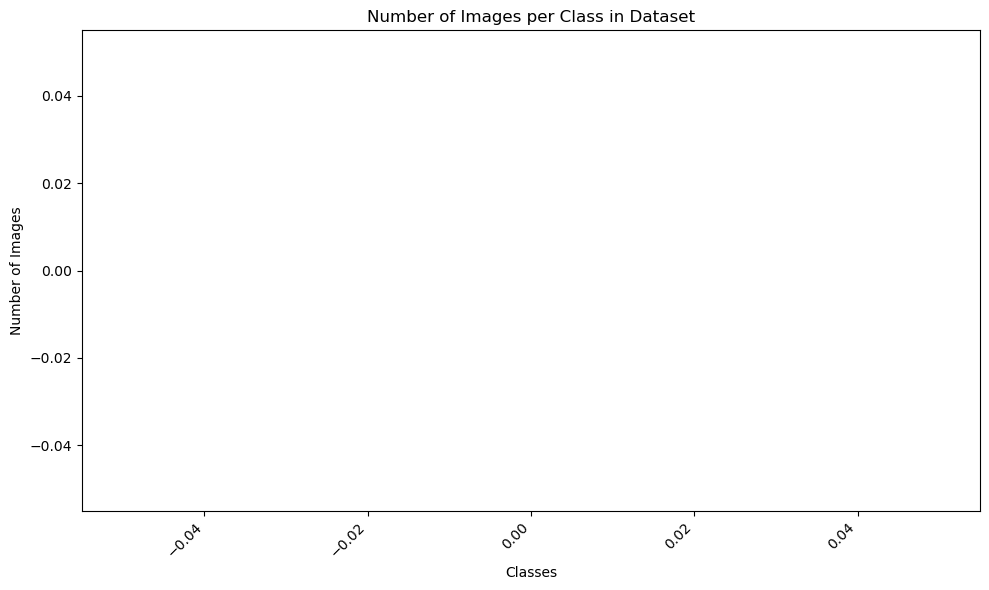


Number of Images per Class:


In [ ]:
import json
import os
import matplotlib.pyplot as plt
from collections import Counter

# Paths to annotation files
annotation_dir = "noaug_coco/annotations"  # Adjust if your path is different
splits = ["train.json", "val.json", "test.json"]

# Dictionary to store category names and image counts per class
category_names = {}
image_per_class = Counter()

# Process each JSON file
for split in splits:
    json_path = os.path.join(annotation_dir, split)
    if not os.path.exists(json_path):
        print(f"Warning: {json_path} not found, skipping.")
        continue

    with open(json_path, 'r') as f:
        data = json.load(f)

    # Get category names (assumes 'categories' field exists)
    if not category_names and "categories" in data:
        category_names = {cat["id"]: cat["name"] for cat in data["categories"]}

    # Map category_id to image_id (count unique images)
    image_ids_per_category = {}
    for ann in data["annotations"]:
        category_id = ann["category_id"]
        image_id = ann["image_id"]
        if category_id not in image_ids_per_category:
            image_ids_per_category[category_id] = set()
        image_ids_per_category[category_id].add(image_id)
    
    # Update counts
    for category_id, image_ids in image_ids_per_category.items():
        image_per_class[category_id] += len(image_ids)

# Prepare data for plotting
if not category_names:
    print("No category names found. Using category IDs as labels.")
    category_names = {id: str(id) for id in image_per_class.keys()}

categories = sorted(image_per_class.keys())
counts = [image_per_class[cat] for cat in categories]
labels = [category_names.get(cat, str(cat)) for cat in categories]

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color="skyblue", edgecolor="black")
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.title("Number of Images per Class in Dataset")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Show plot
plt.show()

# Print summary
print("\nNumber of Images per Class:")
for cat_id, count in zip(categories, counts):
    label = category_names.get(cat_id, str(cat_id))
    print(f"{label}: {count}")